In [189]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def random_net(nodes_number, threshold_initialization):
    Q = nx.DiGraph()
    nodes = [node for node in range(nodes_number)]
    Q.add_nodes_from(nodes)

    for i in range(nodes_number):
        for j in range(nodes_number):
            if i != j:
                p = random.random()
                if p > threshold_initialization:
                    w = float("%.2f" % random.random())
                    Q.add_edge(i, j, weight=w)
    return Q

# Barabasi model
def barabasi_net(nodes_number):
    Q = nx.barabasi_albert_graph(nodes_number, 1)
    for i in range(nodes_number):
        for j in range(i, nodes_number):
            if Q.has_edge(i, j):
                Q[i][j]['weight'] = random.random()
    return Q

def show_weighted(Q):
    elarge = [(u, v) for (u, v, d) in Q.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in Q.edges(data=True) if d["weight"] <= 0.5]

    pos = nx.spring_layout(Q, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(Q, pos, node_size=300)

    # edges
    nx.draw_networkx_edges(Q, pos, edgelist=elarge, width=2)
    nx.draw_networkx_edges(
        Q, pos, edgelist=esmall, width=2, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(Q, pos, font_size=10, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(Q, "weight")
    nx.draw_networkx_edge_labels(Q, pos, edge_labels, font_size=8)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

import networkx as nx
import matplotlib.pyplot as plt

def see_log(Q):
    # print network size
    N = nx.number_of_nodes(Q)
    E = nx.number_of_edges(Q)
    #print('original no. nodes: ', len(Q.nodes))
    print('no. nodes: ', N)
    print('no. edges: ', E)

    # calculate the average degree
    k_list = [val for (node, val) in nx.degree(Q)]  # make a list "k_list" of degrees for all nodes
    print('avg. degree: %.4f'% (sum(k_list)/N) )    # calculate the average degree of the network
    print('max degree: ', sorted(Q.degree, key=lambda x: x[1], reverse=True)[0][1])

    # Make the histogram of degree, i.e. the number of nodes with a certain degree
    h_deg = nx.degree_histogram(Q)       # calculate the degree histogram
    h_deg_n = [x / N for x in h_deg]     # normalise the histogram to make a pdf
    v_deg = list( range(0,len(h_deg) ))  # create a list of degree values, from 0 to len(h_deg)

    # Draw the histogram, using log-scale on the axes (why? try without log-scale)
    plt.title('Network')
    plt.ylabel('Normalised Count')
    plt.xlabel('Degree')
    plt.yscale('log')
    plt.xscale('log')
    #plt.bar(v_deg, h_deg_n, width=0.8, color='b')  # this plot using "bars", but "bars" are not good when using log-scale in the axes - DO NOT USE IT UNLESS THE HISTOGRAM IS SMALL!
    plt.plot(v_deg, h_deg_n, 'b+')

    # Draw an eye-guide curve. In this case a power-law with exponent 1.8
    list_x = list( range(1,sorted(Q.degree, key=lambda x: x[1], reverse=True)[0][1]) )                    # Create the values for the x-axis and convert to a list
    list_y = list( [ 1/(i**1.8) for i in list_x ] )   # Create the values for the y-axis and convert to a list:
                                                    # this code is called "list comprehension" [ 1/(i**1.8) for i in list_x ] -> for each item "i" in the list "list_x", the output is "1/(i**1.8)"
    plt.plot(list_x, list_y, 'r--')

    plt.show()

def see_histogram(Q):
    h_deg = nx.degree_histogram(Q)

    # Creates a list of degree values (from 0 to the size of h_deg) for plotting
    v_deg = list( range(0, len(h_deg)) )

    # Plot the degree distribution
    import matplotlib.pyplot as plt
    plt.figure(figsize = (4,4), tight_layout = True)
    plt.ylabel('Non-normalised Count')
    plt.xlabel('Degree')
    plt.bar(v_deg, h_deg, width = 0.8, color = 'b')  
    plt.show()

def run_trust_alg(Q, threshold_trust=0.5):
    for i in range(len(Q.nodes)):
        neighbors_i = list(Q.neighbors(i))
        for n in neighbors_i:
            if Q[i][n]['weight'] > threshold_trust:
                neighbors_n = list(Q.neighbors(n))
                for m in neighbors_n:
                    if m == i:
                        continue
                    '''if Q.has_edge(i, m):
                        if Q[n][m]['weight'] > threshold_trust:
                            print(f'Increasing trust between {i} and {m}')
                            Q[i][m]['weight'] = float("%.2f" % (Q[i][m]['weight'] * 1.1))
                    else:'''
                    if not Q.has_edge(i, m):
                        print(f'Adding trust between {i} and {m}')
                        Q.add_edge(i, m, weight=float("%.2f" % (Q[n][m]['weight']/2)))

In [190]:
Q = random_net(100, 0.9)
#Q = barabasi_net(30)

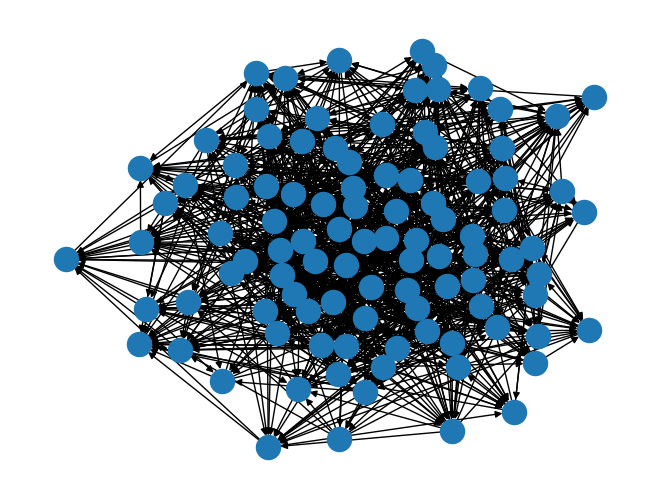

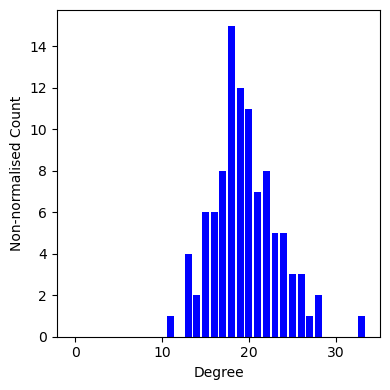

In [191]:
nx.draw(Q)
see_histogram(Q)
#see_log(Q)
#show_weighted(Q)

In [192]:
run_trust_alg(Q, 0.9)

Adding trust between 3 and 11
Adding trust between 3 and 21
Adding trust between 3 and 46
Adding trust between 3 and 49
Adding trust between 3 and 57
Adding trust between 3 and 60
Adding trust between 3 and 65
Adding trust between 3 and 72
Adding trust between 3 and 73
Adding trust between 3 and 96
Adding trust between 4 and 14
Adding trust between 4 and 21
Adding trust between 4 and 30
Adding trust between 4 and 34
Adding trust between 4 and 43
Adding trust between 4 and 55
Adding trust between 4 and 90
Adding trust between 5 and 0
Adding trust between 5 and 35
Adding trust between 5 and 42
Adding trust between 5 and 48
Adding trust between 5 and 64
Adding trust between 5 and 70
Adding trust between 5 and 89
Adding trust between 5 and 12
Adding trust between 5 and 40
Adding trust between 5 and 53
Adding trust between 5 and 61
Adding trust between 5 and 65
Adding trust between 5 and 74
Adding trust between 5 and 80
Adding trust between 5 and 99
Adding trust between 6 and 25
Adding trus

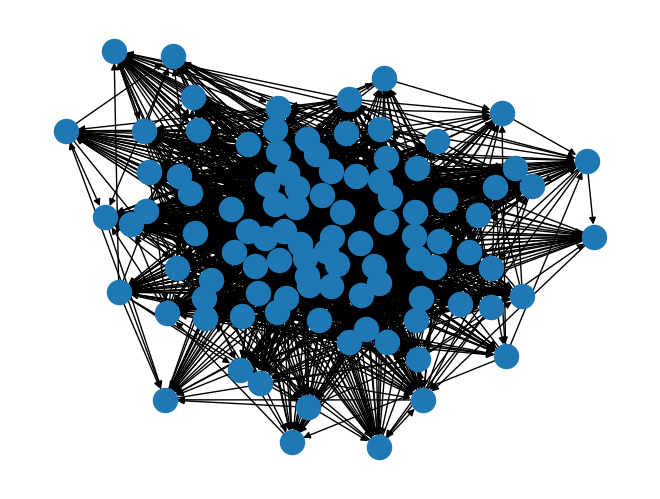

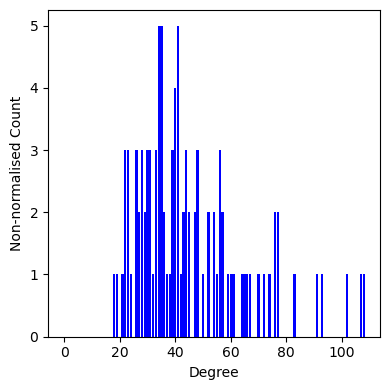

In [193]:
nx.draw(Q)
see_histogram(Q)
#see_log(Q)
#show_weighted(Q)